In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f'Shape of the training data: {x_train.shape}')
print(f'Shape of the training target: {y_train.shape}')
print(f'Shape of the test data: {x_test.shape}')
print(f'Shape of the test target: {y_test.shape}')

Shape of the training data: (60000, 28, 28)
Shape of the training target: (60000,)
Shape of the test data: (10000, 28, 28)
Shape of the test target: (10000,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers

from tensorflow.keras.utils import to_categorical

In [ ]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [ ]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Label size {y_train.shape}")
print(f"Label size {y_test.shape}")

Label size (60000, 10)
Label size (10000, 10)


In [ ]:
print(y_train[0])
print(y_train[0].argmax())

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


#### Plotting Images

In [ ]:
print(x_train.shape)

(60000, 28, 28)


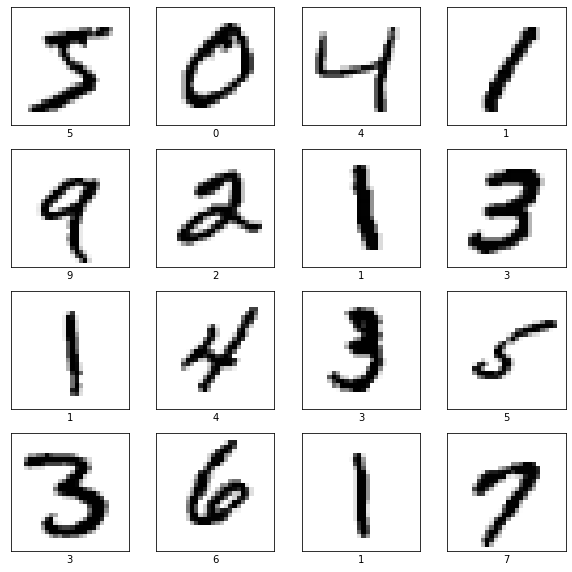

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i].argmax())
plt.show()


In [ ]:
# Reshaping the data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Normalizing
x_train = x_train/255
x_test = x_test/255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


#### Build the Model

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(x_train,y_train, 
                    epochs = epochs, batch_size=64,
                    validation_data = (x_test,y_test),
                    verbose=1)

Epoch 1/10
938/938 [==============================] - 141s 150ms/step - loss: 0.1476 - accuracy: 0.9542 - val_loss: 0.0465 - val_accuracy: 0.9842
Epoch 2/10
938/938 [==============================] - 140s 150ms/step - loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.0330 - val_accuracy: 0.9891
Epoch 3/10
938/938 [==============================] - 141s 151ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0305 - val_accuracy: 0.9899
Epoch 4/10
938/938 [==============================] - 139s 149ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 5/10
938/938 [==============================] - 139s 148ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0275 - val_accuracy: 0.9911
Epoch 6/10
938/938 [==============================] - 139s 149ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0291 - val_accuracy: 0.9912
Epoch 7/10
938/938 [==============================] - 136s 145ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0293 -

In [ ]:
print(history.history)

{'loss': [0.14759176969528198, 0.04569181054830551, 0.03251982480287552, 0.02552933059632778, 0.021803857758641243, 0.014944470487535, 0.013337410055100918, 0.01131936814635992, 0.010650898329913616, 0.010295302607119083], 'accuracy': [0.9542166590690613, 0.9854999780654907, 0.9894333481788635, 0.9917833209037781, 0.9930333495140076, 0.9950833320617676, 0.9955666661262512, 0.9963499903678894, 0.9962999820709229, 0.996483325958252], 'val_loss': [0.04653375595808029, 0.03301410377025604, 0.03047085553407669, 0.02987927943468094, 0.027506213635206223, 0.029054120182991028, 0.02933916077017784, 0.03503725677728653, 0.034750424325466156, 0.027760880067944527], 'val_accuracy': [0.9842000007629395, 0.9890999794006348, 0.9898999929428101, 0.9904000163078308, 0.991100013256073, 0.9911999702453613, 0.9908000230789185, 0.9894999861717224, 0.9902999997138977, 0.9909999966621399]}


#### Plot Training and Validation Loss and Accuracy

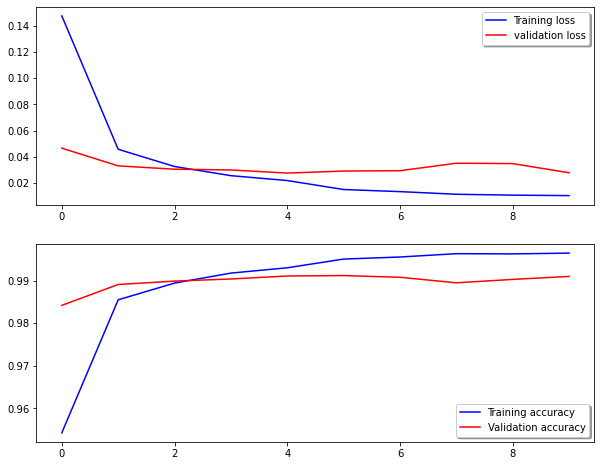

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10, 8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#### Making Predictions

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[4.90773736e-14, 1.20793917e-10, 1.53896340e-10, ...,
        9.99999881e-01, 3.02741577e-12, 1.00487185e-07],
       [1.61777990e-14, 8.62437118e-12, 1.00000000e+00, ...,
        4.13558013e-16, 4.98570843e-14, 1.98285698e-17],
       [9.26350163e-10, 9.99999642e-01, 2.16768150e-08, ...,
        1.76783146e-07, 2.85639370e-08, 2.52912873e-08],
       ...,
       [1.08652950e-15, 4.57995239e-11, 3.72043271e-13, ...,
        4.83650175e-10, 1.37096610e-11, 5.61531099e-10],
       [3.95906907e-09, 2.48515564e-13, 8.06365811e-14, ...,
        1.57940050e-11, 1.20246932e-06, 9.45302656e-11],
       [3.69205253e-07, 2.92132929e-10, 1.05093910e-07, ...,
        1.22338595e-13, 1.59307470e-10, 2.25370989e-11]], dtype=float32)

In [ ]:
print(y_pred[0])
print(y_pred[0].argmax())

[4.90773736e-14 1.20793917e-10 1.53896340e-10 5.35164024e-10
 5.50585723e-11 2.22201441e-11 1.33519021e-15 9.99999881e-01
 3.02741577e-12 1.00487185e-07]
7


In [ ]:
y_pred_labels=[]
print(len(y_pred))
for i in range(len(y_pred)):
    y_pred_labels.append(y_pred[i].argmax())
print(y_pred_labels)

10000
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 

In [ ]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
y_test_labels=[]
print(len(y_test))
for i in range(len(y_test)):
    y_test_labels.append(y_test[i].argmax())
print(y_test_labels)

10000
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_labels,y_pred_labels)

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1133,    0,    0,    0,    0,    0,    0,    2,    0],
       [   1,    1, 1022,    3,    1,    0,    0,    3,    1,    0],
       [   0,    0,    0, 1003,    0,    5,    0,    0,    0,    2],
       [   0,    0,    1,    0,  969,    0,    1,    1,    0,   10],
       [   0,    0,    0,    4,    0,  887,    1,    0,    0,    0],
       [   5,    2,    1,    0,    1,    3,  945,    0,    1,    0],
       [   0,    4,    3,    0,    0,    0,    0, 1017,    1,    3],
       [   5,    0,    2,    0,    1,    3,    0,    0,  962,    1],
       [   1,    0,    0,    1,    2,    4,    0,    3,    3,  995]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_labels,y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### Plotting Predictions

In [ ]:
print(x_test.shape)

(10000, 28, 28, 1)


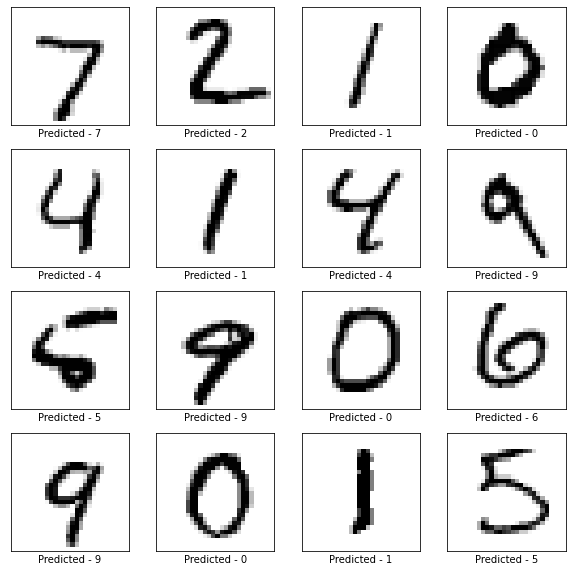

In [ ]:
y_pred = model.predict(x_test)
test_img = x_test.reshape(x_test.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted - {y_pred[i].argmax()}')
plt.show()

In [ ]:
print(x_test.shape)

(10000, 28, 28, 1)


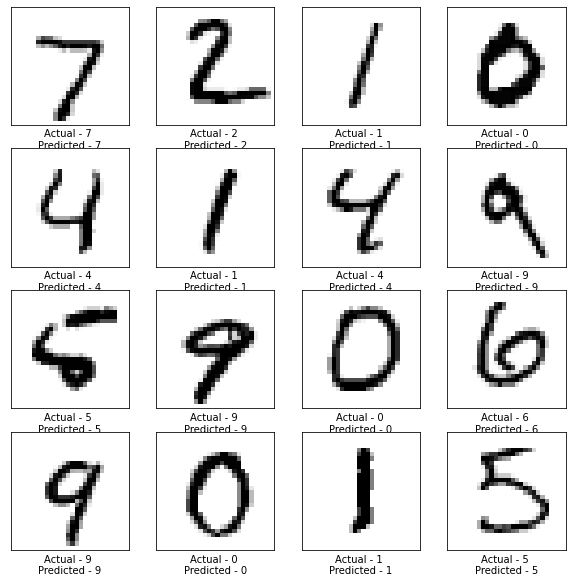

In [ ]:
test_img = x_test.reshape(x_test.shape[0], 28, 28)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual - {y_test[i].argmax()} \nPredicted - {y_pred[i].argmax()}')
plt.show()